<a href="https://colab.research.google.com/github/kenzfinn/csc1035_lecture_examples/blob/master/Part2_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analytics, Computer Vision & AI - CSC3831
## Coursework, Part 2: Machine Learning

As this coursework is as much about practical skills as it is about reflecting on the procedures and the results, you are expected to explain what you did, your reasoning for process decisions, as well as a thorough analysis of your results.

### 1. Load the MNIST dataset, visualise the first 20 digits, and print their corresponding labels.

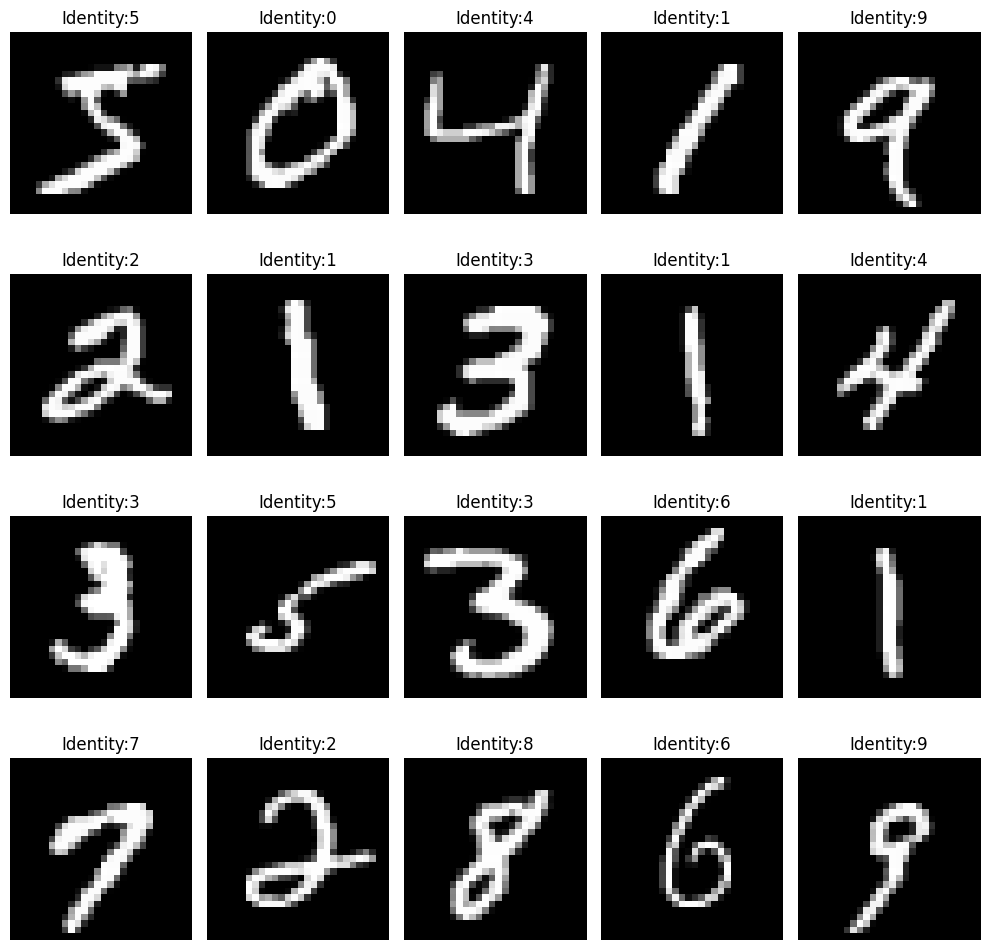

In [11]:
# Run this to load the MNIST dataset
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt

X, y = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)
#this starting code allows us to open the MNIST dataset and set the images to the X list and the labels to the y list
figure, axes = plt.subplots(4, 5, figsize=(10, 10))
#creates subplots for the images to be displayed, 4 rows with 5 columns

axes = axes.ravel()
#creates a 1D array out of the 2D array

for i in range(20):
  image = X[i].reshape(28,28)
  #there is 784 bits in this image therefore needs to be made into 28x28 grid
  axes[i].imshow(image, cmap='grey')
  #renders the image as gray on the grid
  axes[i].axis('off')
  #gets rid of the axis so it looks like an image rather the subplot
  axes[i].set_title('Identity:' +y[i])
  #identifier

plt.tight_layout()
plt.show()


### 2. Train a Logistic Regression classifier on this data, and report on your findings.
    
1. Tune your hyperparameters to ensure *sparse* weight vectors and high accuracy.
2. Visualise the classification vector for each class.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import (
    LogisticRegression,
)

X, y = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)

scaler = StandardScaler()
XScale = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(XScale, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='ovr', penalty='l2')


param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy * 100:.2f}%")


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Test accuracy: 91.69%


### 3. Use PCA to reduce the dimensionality of your training data.
    
1. Determine the number of components necessary to explain 80\% of the variance
2. Plot the explained variance by number of components.
3. Visualise the 20 principal components' loadings
4. Plot the two principal components for your data using a scatterplot, colouring by class. What can you say about this plot?
5. Visualise the first 20 digits, *generated from their lower-dimensional representation*.

### 4. Generate a noisy copy of your data by adding random normal noise to the digits **with a scale that doesn't completely destroy the signal**. This is, the resulting images noise should be apparent, but the numbers should still be understandable.
    
1. Visualise the first 20 digits from the noisy dataset.
2. Filter the noise by fitting a PCA explaining **a sufficient proportion** of the variance, and then transforming the noisy dataset. Figuring out this proportion is part of the challenge.
3. Visualise the first 20 digits of the de-noised dataset.